In [18]:
import matplotlib.pyplot as plt
import torch
from matplotlib.pyplot import MultipleLocator
import numpy as np

In [25]:
def plot_l2_loss_2(x, y_nn1, y_nn2, y_gnn1, y_gnn2, xlabel, ylabel, savedir):
    plt.clf()
    plt.rcParams.update({"font.size": 24})
    plt.figure(4, (20, 15), dpi=120)
    x_major_locator=MultipleLocator(5)
    ax=plt.gca()
    
    plt.fill_between(x, y_nn1, y_nn2,  alpha=.5, linewidth=0, color='cornflowerblue')
    plt.fill_between(x, y_gnn1, y_gnn2,  alpha=.5, linewidth=0, color='salmon')
    
    y1 = [(y_nn1[i]+y_nn2[i])/2 for i in range(min(len(y_nn1),len(y_nn2)))]
    y2 = [(y_gnn1[i]+y_gnn2[i])/2 for i in range(min(len(y_gnn1),len(y_gnn2)))]
    
    plt.plot(x, y_nn1, color='royalblue')
    plt.plot(x, y1, 'o-', color='blue', label='PINN')
    plt.plot(x, y_nn2, color='royalblue')
    plt.plot(x, y_gnn1, color='tomato')
    plt.plot(x, y2, 's-', color='red', label='gPINN')
    plt.plot(x, y_gnn2, color='tomato')
    
    plt.yscale('log')
    
    plt.xlabel(ylabel)
    plt.ylabel(xlabel)
    
    plt.legend(frameon=False)
    plt.savefig(savedir, bbox_inches = 'tight', dpi = 120)

In [7]:
l2_u_nn1 = torch.load('./l2_u-pinn-1')
l2_u_nn2 = torch.load('./l2_u-pinn-9')

l2_u_g_nn1 = torch.load('./l2_u_g-pinn-1')
l2_u_g_nn2 = torch.load('./l2_u_g-pinn-9')

error_v_e_nn1 = torch.load('./error_v_e-pinn-1')
error_v_e_nn2 = torch.load('./error_v_e-pinn-9')

In [8]:
l2_u_gnn1 = torch.load('./l2_u-gpinn-w_0.1-9')
l2_u_gnn2 = torch.load('./l2_u-gpinn-w_0.1-10')

l2_u_g_gnn1 = torch.load('./l2_u_g-gpinn-w_0.1-9')
l2_u_g_gnn2 = torch.load('./l2_u_g-gpinn-w_0.1-10')

error_v_e_gnn1 = torch.load('./error_v_e-gpinn-w_0.1-9')
error_v_e_gnn2 = torch.load('./error_v_e-gpinn-w_0.1-10')

In [36]:
error_v_e_nn1

{'training point-5': 1.9690243362621745e-09,
 'training point-10': 2.07962764567953e-08,
 'training point-15': 3.65446912915132e-08,
 'training point-20': 3.291442694241998e-08,
 'training point-25': 1.0007641396318772e-08,
 'training point-30': 3.997620832155175e-10,
 'training point-35': 1.3679019906683156e-10}

In [42]:
y_nn1 = []
for value in error_v_e_nn1.values():
    y_nn1.append(value)
    
y_nn2 = []
for value in error_v_e_nn2.values():
    y_nn2.append(value)

In [43]:
y_gnn1 = []
for value in error_v_e_gnn1.values():
    y_gnn1.append(value)
    
y_gnn2 = []
for value in error_v_e_gnn2.values():
    y_gnn2.append(value)

In [44]:
x = []
for key in l2_u_g_nn1.keys():
    x.append(key[15:])

<Figure size 432x288 with 0 Axes>

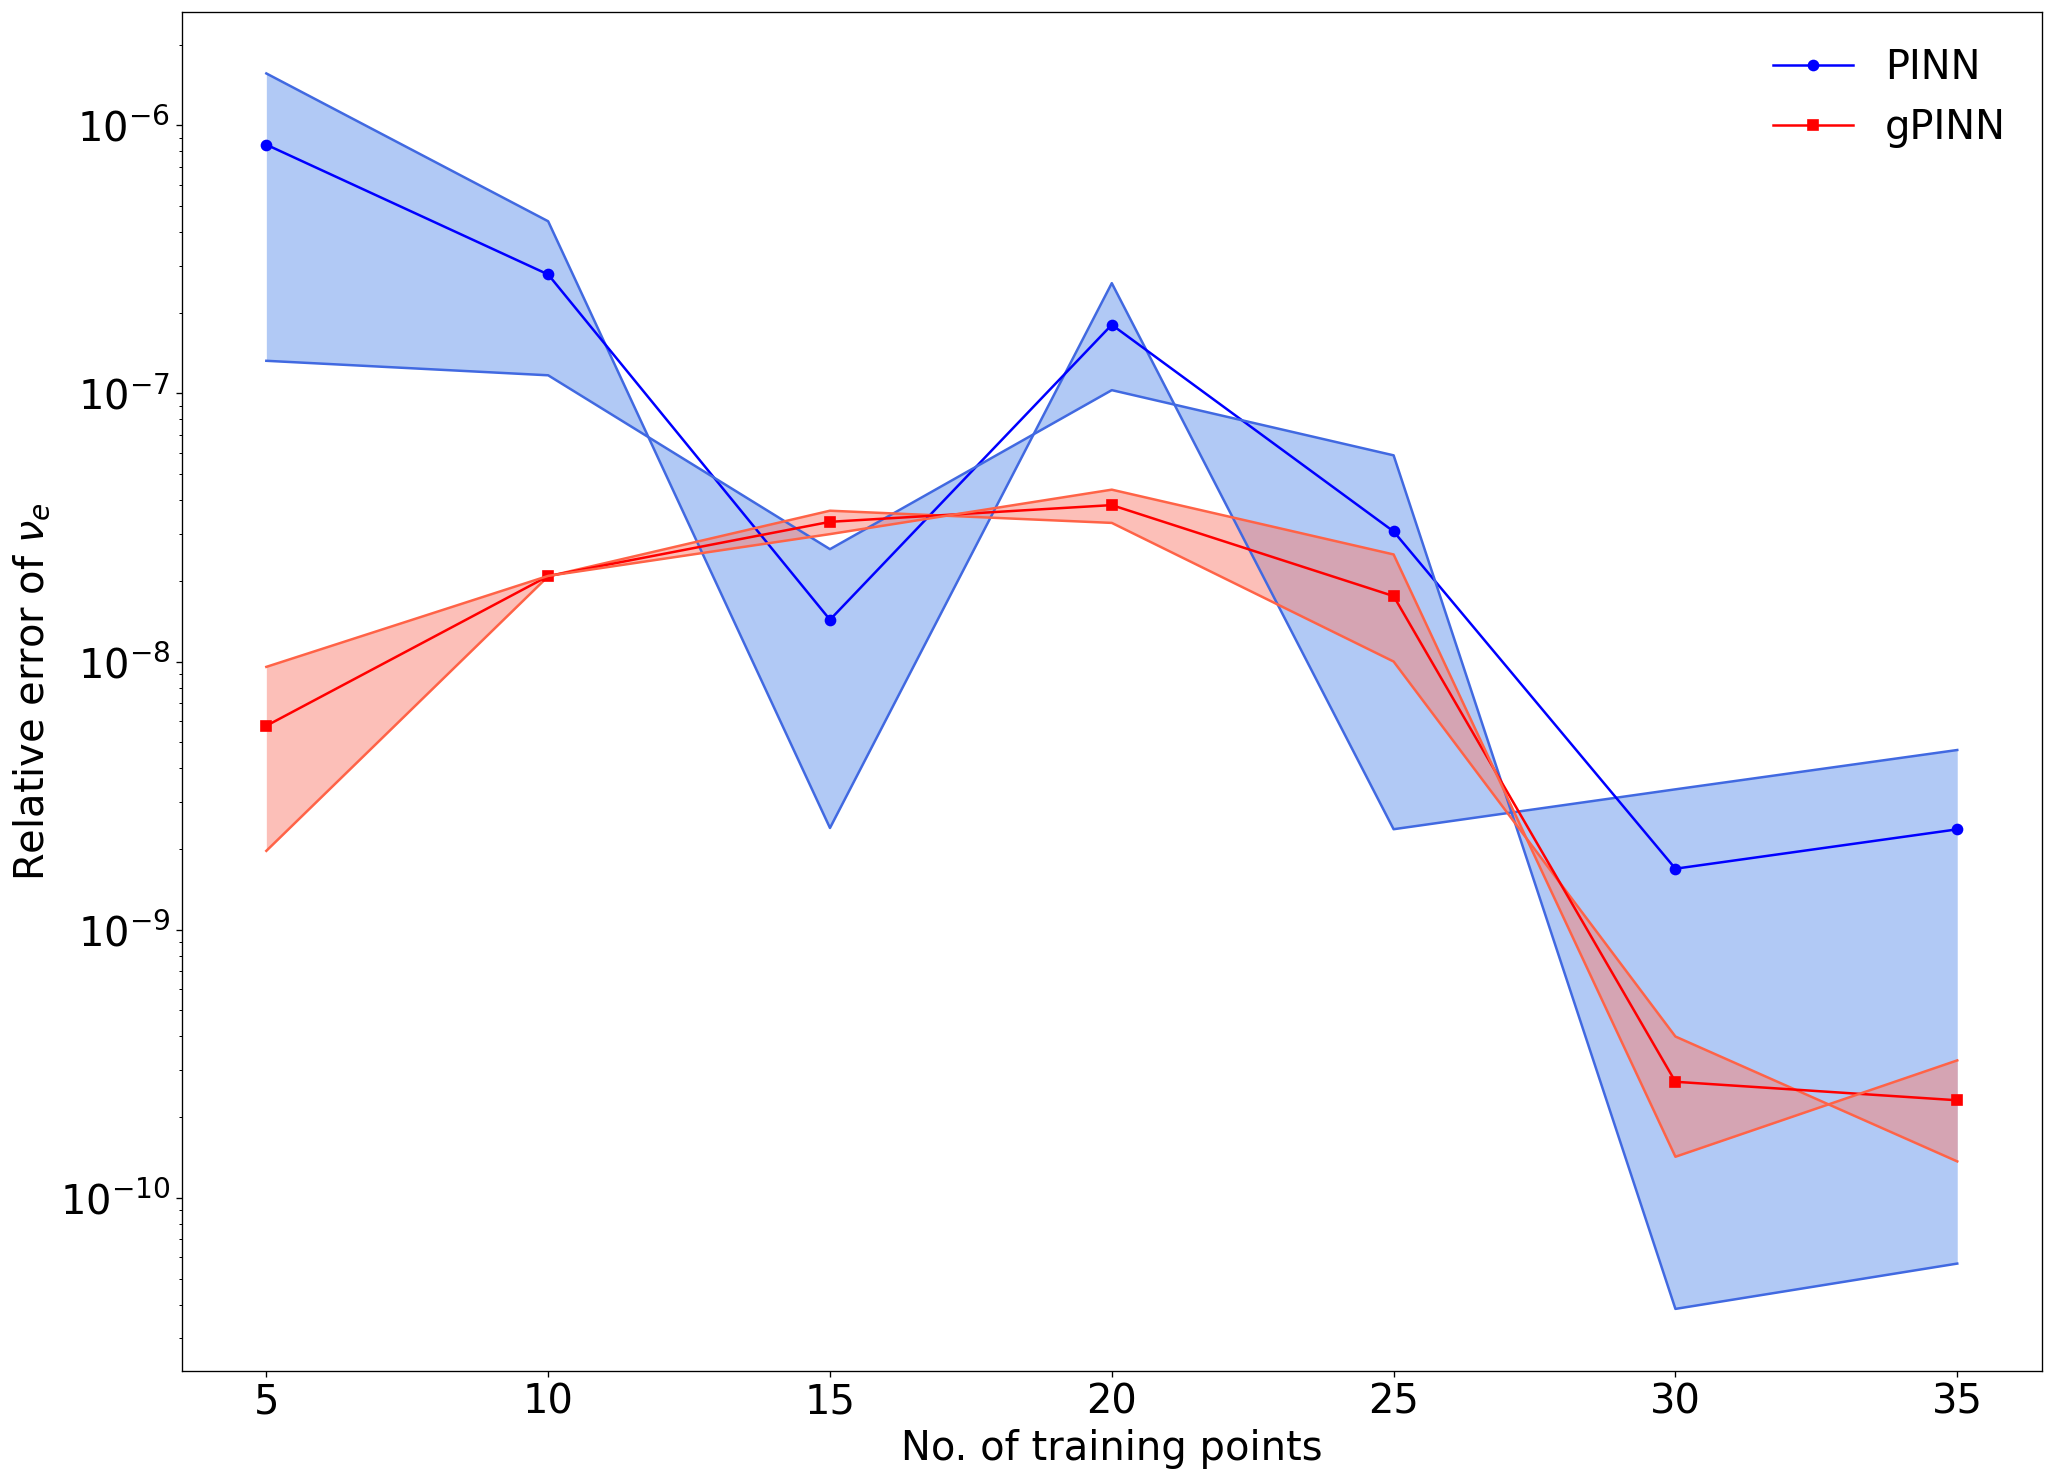

In [47]:
plot_l2_loss_2(x, y_nn1, y_nn2, y_gnn1, y_gnn2, "Relative error of $\\nu_e$", 'No. of training points', './figure6_A.png')